In [1]:
# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#data science - standard library
import pandas as pd
import numpy as np

from scipy.stats import linregress
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy.stats as sts

file_path = "2020_WeaterDataIncluded.csv"

In [2]:
df_2020 = pd.read_csv(file_path)
df_2020.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health Life Expectancy,Freedom,Trust (Government Corruption),Generosity,Year,Latitude,Longitude,City,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
0,Finland,1,7.8087,1.063927,0.954330,0.719008,0.949172,0.195445,-0.059482,2020,61.924110,25.748151,Jyvaskyla,30.42,24.73,100.0,1029.0,3.36,90.0
1,Denmark,2,7.6456,1.077400,0.955991,0.724025,0.951444,0.168489,0.066202,2020,56.263920,9.501785,Kjellerup,42.80,39.51,93.0,1027.0,2.24,98.0
2,Switzerland,3,7.5599,1.097993,0.942847,0.741024,0.921337,0.303728,0.105911,2020,46.818188,8.227512,Sarnen,39.11,35.37,100.0,1028.0,2.39,90.0
3,Iceland,4,7.5045,1.077256,0.974670,0.730000,0.948892,0.711710,0.246944,2020,64.963051,-19.020835,Dalvik,32.00,24.01,86.0,990.0,6.93,90.0
4,Netherlands,6,7.4489,1.081271,0.939139,0.723009,0.908548,0.364717,0.207612,2020,52.132633,5.291266,Soest,49.50,47.59,98.0,1025.0,3.04,81.0


In [3]:
corrs = df_2020.corr()
corrs

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health Life Expectancy,Freedom,Trust (Government Corruption),Generosity,Year,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
Happiness Rank,1.000000,-0.989350,-0.787332,-0.748516,-0.784319,-0.547383,0.369931,-0.018896,NaN,-0.414441,0.127172,0.347082,0.319028,-0.254011,-0.127056,0.026406,-0.178585
Happiness Score,-0.989350,1.000000,0.782246,0.752758,0.779330,0.533809,-0.394718,0.043252,NaN,0.438688,-0.120805,-0.350897,-0.325926,0.241461,0.119580,-0.025655,0.178344
Economy (GDP per Capita),-0.787332,0.782246,1.000000,0.787668,0.852842,0.406997,-0.324605,-0.133751,NaN,0.453331,0.070495,-0.362393,-0.348067,0.204374,0.117379,0.037911,0.065092
Social Support,-0.748516,0.752758,0.787668,1.000000,0.738322,0.417771,-0.191488,-0.082413,NaN,0.359530,-0.012890,-0.386473,-0.382566,0.200547,0.137266,0.139172,0.164942
Health Life Expectancy,-0.784319,0.779330,0.852842,0.738322,1.000000,0.424909,-0.355364,-0.079266,NaN,0.469568,0.005485,-0.377782,-0.350043,0.236007,0.107919,-0.053784,0.075661
Freedom,-0.547383,0.533809,0.406997,0.417771,0.424909,1.000000,-0.408822,0.248954,NaN,0.058057,0.037441,-0.023911,0.010683,0.195759,-0.105497,0.038442,0.220587
Trust (Government Corruption),0.369931,-0.394718,-0.324605,-0.191488,-0.355364,-0.408822,1.000000,-0.256087,NaN,-0.156144,-0.131017,0.055677,0.064160,-0.062026,-0.035364,-0.084500,-0.238941
Generosity,-0.018896,0.043252,-0.133751,-0.082413,-0.079266,0.248954,-0.256087,1.000000,NaN,-0.007999,0.234659,0.205532,0.217164,-0.049924,-0.040768,-0.040234,0.077791
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,-0.414441,0.438688,0.453331,0.359530,0.469568,0.058057,-0.156144,-0.007999,NaN,1.000000,0.060939,-0.619439,-0.598384,0.184676,0.172492,-0.157638,0.073774


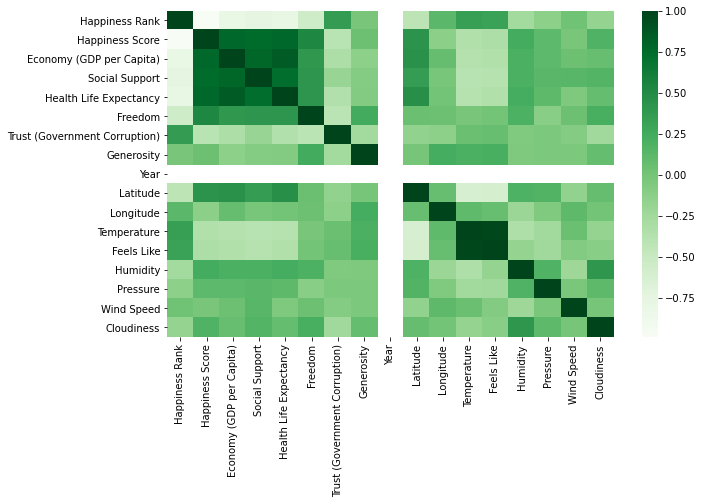

In [4]:
plt.figure(figsize=(10,6))
sns.heatmap(corrs, cmap = "Greens")
plt.savefig("Images/Correlation Heat Map.png")
plt.show()

y = 10.29x + -35.96
0.43868840883507587


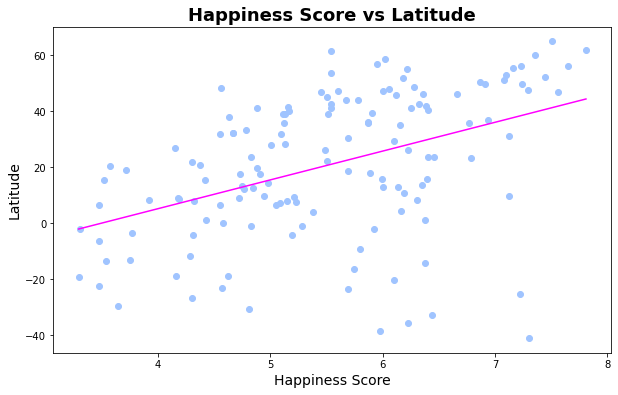

In [18]:
plt.figure(figsize=(10,6))

target = df_2020["Latitude"]
feature = df_2020["Happiness Score"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(feature, target)
regress_values = feature * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(rvalue)
plt.scatter(df_2020["Happiness Score"], df_2020["Latitude"], marker="o", color = "#A0C4FF")
plt.plot(feature,regress_values, "fuchsia", alpha = 1)
#print(line_eq)
# Incorporate the other graph properties
plt.title("Happiness Score vs Latitude", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.ylabel("Latitude", fontsize=14, fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname = "DejaVu Sans")


# Show plot
plt.savefig("Images/Scatter Plot with Latitude vs Happiness Score.png")
# Show plot
plt.show()

y = -5.15x + 87.95
-0.35089715694761725


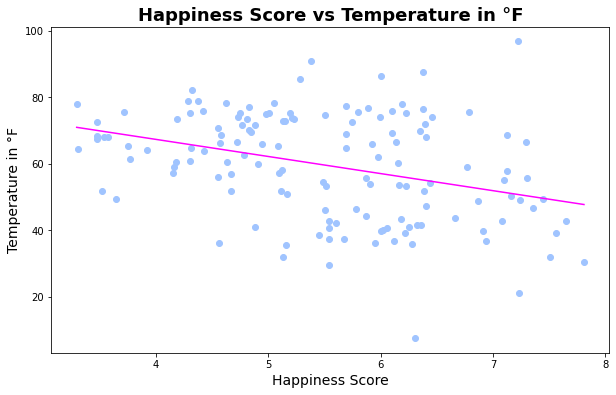

In [19]:
plt.figure(figsize=(10,6))

target = df_2020["Temperature"]
feature = df_2020["Happiness Score"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(feature, target)
regress_values = feature * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(rvalue)
plt.scatter(df_2020["Happiness Score"], df_2020["Temperature"], marker="o", color = "#A0C4FF")
plt.plot(feature ,regress_values,"fuchsia", alpha = 1)
#print(line_eq)
# Incorporate the other graph properties
plt.title("Happiness Score vs Temperature in °F", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.ylabel("Temperature in °F", fontsize=14, fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname = "DejaVu Sans")


plt.savefig("Images/Scatter Plot with Temperature vs Happiness Score.png")
# Show plot
plt.show()

y = 4.91x + 47.36
0.2414609748952903


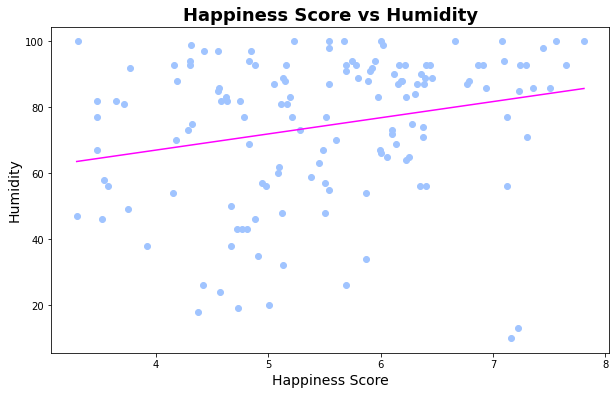

In [20]:
target2 = df_2020["Humidity"]
feature2 = df_2020["Happiness Score"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(feature2, target2)
regress_values2 = feature2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,6))

plt.scatter(df_2020["Happiness Score"],df_2020["Humidity"], marker="o", color = "#A0C4FF")
plt.plot(feature2 ,regress_values2,"fuchsia", alpha = 1)

print(line_eq)
print(rvalue)
# Incorporate the other graph properties
plt.title("Happiness Score vs Humidity", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.ylabel("Humidity", fontsize=14, fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname = "DejaVu Sans")

plt.savefig("Images/Scatter Plot with Humidity vs Happiness Score.png")
# Show plot
plt.show()

In [8]:
x_value = df_2020["Temperature"]
y_value = df_2020["Happiness Score"]

In [9]:
# STATSMODELS
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     19.38
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           2.13e-05
Time:                        12:48:43   Log-Likelihood:                -200.76
No. Observations:                 140   AIC:                             405.5
Df Residuals:                     138   BIC:                             411.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.9350      0.335     20.711      0.000       6.273       7.597
Temperature    -0.0239      0.005     -4.402      0.000      -0.035      -0.013
==============================================================================
Omnibus:                        3.742   Durbin-Watson:                   0.236
Prob(Omnibus):                  0.154   Jarque-Bera (JB):                2.242
Skew:                           0.013   Prob(JB):                        0.326
Kurtosis:                       2.381   Cond. No.                         239.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
y_value2 = df_2020["Humidity"]
x_value2 = df_2020["Happiness Score"]
# STATSMODELS
X = sm.add_constant(x_value2)
Y = y_value2
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Humidity   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     8.544
Date:                Thu, 12 Nov 2020   Prob (F-statistic):            0.00405
Time:                        12:48:43   Log-Likelihood:                -627.58
No. Observations:                 140   AIC:                             1259.
Df Residuals:                     138   BIC:                             1265.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              47.3563      9.442      5.016      0.000      28.687      66.026
Happiness Score     4.9138      1.681      2.923      0.004       1.590       8.238
==============================================================================
Omnibus:                       23.800   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.740
Skew:                          -1.054   Prob(JB):                     3.48e-07
Kurtosis:                       3.811   Cond. No.                         30.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
x_value3 = df_2020[['Latitude',
       'Humidity', 'Cloudiness']]
y_value3 = df_2020["Happiness Score"]
X = sm.add_constant(x_value3)
Y = y_value3
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     13.30
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           1.15e-07
Time:                        12:48:43   Log-Likelihood:                -191.95
No. Observations:                 140   AIC:                             391.9
Df Residuals:                     136   BIC:                             403.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5600      0.289     15.805      0.000       3.989       5.131
Latitude       0.0174      0.003      5.321      0.000       0.011       0.024
Humidity       0.0062      0.004      1.509      0.134      -0.002       0.014
Cloudiness     0.0026      0.002      1.165      0.246      -0.002       0.007
==============================================================================
Omnibus:                        2.416   Durbin-Watson:                   0.501
Prob(Omnibus):                  0.299   Jarque-Bera (JB):                2.256
Skew:                           0.311   Prob(JB):                        0.324
Kurtosis:                       2.970   Cond. No.                         344.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
predictions = results.predict()
resids = y_value3 - predictions 
print(resids)

0      1.312924
1      1.270786
2      1.326887
3      1.042939
4      1.159547
         ...   
135   -1.353960
136   -1.706985
137   -1.872146
138   -1.941109
139   -1.274959
Name: Happiness Score, Length: 140, dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

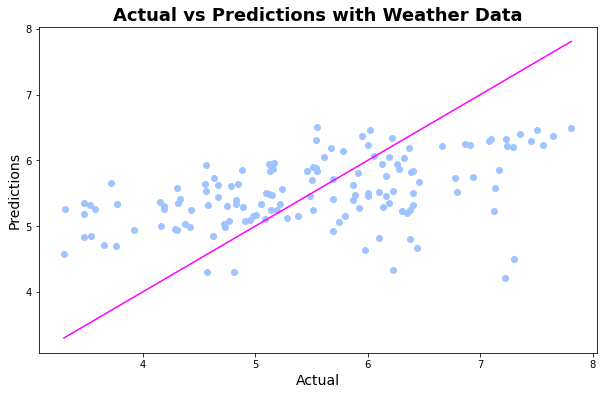

In [21]:
plt.figure(figsize=(10,6))

plt.scatter(y_value, predictions, color ="#A0c4ff")
plt.plot(y_value, y_value, color="fuchsia", alpha = 1)
plt.title("Actual vs Predictions with Weather Data", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Actual", fontsize=14, fontname = "DejaVu Sans")
plt.ylabel("Predictions", fontsize=14, fontname = "DejaVu Sans")
plt.savefig("Images/actual vs predictions with weather.png")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

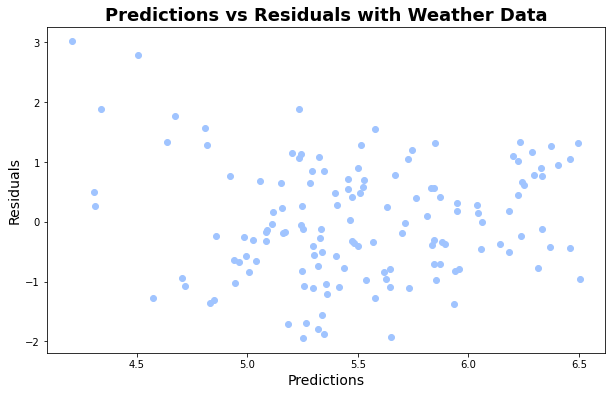

In [14]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, resids, color ="#A0c4ff")
plt.xlabel("Predictions", fontsize=14, fontname = "DejaVu Sans")
plt.ylabel("Residuals", fontsize=14, fontname = "DejaVu Sans")
plt.title("Predictions vs Residuals with Weather Data", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")

plt.savefig("Images/Predictions vs Residuals.png")
plt.show

In [15]:
reg = LinearRegression()
reg.fit(x_value3, y_value3)
reg.coef_

array([0.01739473, 0.00621977, 0.00262925])

In [16]:
fakeData = [[47.6062, 10, 100]]

In [17]:
reg.predict(fakeData)

array([5.71323309])